<a href="https://colab.research.google.com/github/advcloud/colabtest/blob/main/yolov5mtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q wandb
api_key = ""
!wandb login $api_key
projectn ='yolov5wandb6'
projectn1 =projectn+'/exp/weights/best.pt'
projectn2 ='/content/gdrive/My\ Drive/weights/'+projectn+'.pt'
DATASETk1 ="https://app.roboflow.com/d"

     |████████████████████████████████| 1.8 MB 33.7 MB/s 
     |████████████████████████████████| 181 kB 71.2 MB/s 
     |████████████████████████████████| 145 kB 69.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Cloning into 'yolov5'...
remote: Enumerating objects: 12255, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 12255 (delta 13), reused 14 (delta 8), pack-reused 12229
Receiving objects: 100% (12255/12255), 12.00 MiB | 11.88 MiB/s, done.
Resolving deltas: 100% (8483/8483), done.
/content/yolov5
     |████████████████████████████████| 596 kB 34.0 MB/s 
Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [3]:
# Export code snippet and paste here
%cd /content
#!curl -L "https://public.roboflow.ai/ds/vJUg9kAnOG?key=YOUR DATASET HERE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
!curl -L $DATASETk1 > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1381      0 --:--:-- --:--:-- --:--:--  1379
100 6235k  100 6235k    0     0  3386k      0  0:00:01  0:00:01 --:--:--  344M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/000008_jpg.rf.mGVG2rugPr7HhrUtfzmV.jpg  
 extracting: test/images/000011_jpg.rf.uVFgZMBbMtl2ZtJJfJie.jpg  
 extracting: test/images/000034_jpg.rf.iPCcjQjelZHTZ4mpHsih.jpg  
 extracting: test/images/000047_jpg.rf.RamkVNfIo0RcEQPqjaRG.jpg  
 extracting: test/images/000054_jpg.rf.1nwwos0YGlQxB1kNBUib.jpg  
 extracting: test/images/000073_jpg.rf.vFpZd0j3MOYq1IENE4NS.jpg  
 extracting: test/images/000076_jpg.rf.np9UwwgqQguwigjSBwP9.jpg  
 extracting: test/images/000084_jpg.rf.UlfLihL9bwmYhxXLp6vY.jpg  
 ex

In [4]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['head', 'helmet', 'person']

In [5]:
# train yolov5s
%%time
%cd /content/yolov5/
#!python train.py --img 416 --batch 40 --epochs 40 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache
!python train.py --img 416 --batch 40  --data ../data.yaml --epochs 50  --project $projectn --weights yolov5m.pt --device 0 --cfg ./models/yolov5m.yaml

/content/yolov5
wandb: Currently logged in as: clair (claireye). Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=40, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5wandb6, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,

In [6]:
%ls $projectn1

yolov5wandb6/exp/weights/best.pt


In [7]:
!python detect.py --weights $projectn1 --conf 0.4 --source ../test/images/

detect: weights=['yolov5wandb6/exp/weights/best.pt'], source=../test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20861016 parameters, 0 gradients
image 1/10 /content/test/images/000008_jpg.rf.mGVG2rugPr7HhrUtfzmV.jpg: 640x640 3 helmets, Done. (0.029s)
image 2/10 /content/test/images/000011_jpg.rf.uVFgZMBbMtl2ZtJJfJie.jpg: 640x640 4 heads, 14 helmets, Done. (0.029s)
image 3/10 /content/test/images/000034_jpg.rf.iPCcjQjelZHTZ4mpHsih.jpg: 640x640 1 helmet, Done. (0.029s)
image 4/10 /content/test/images/000047_jpg.rf.

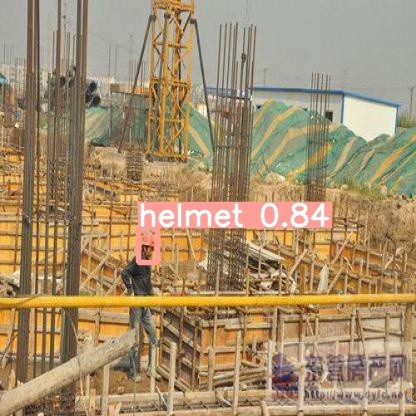

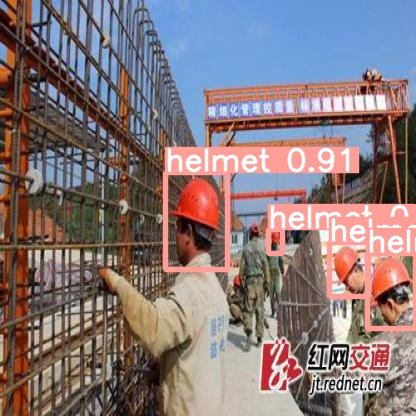

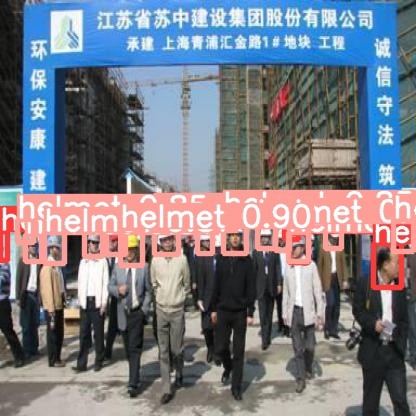

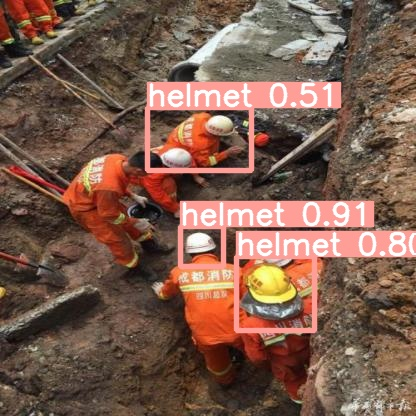

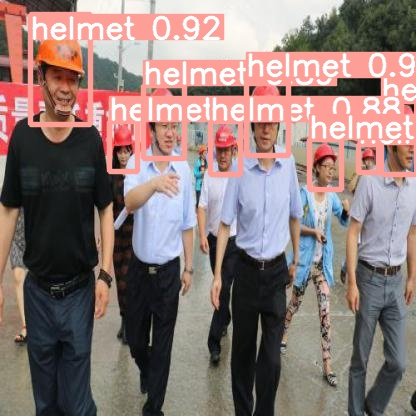

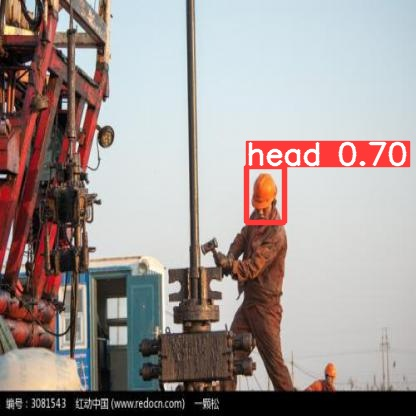

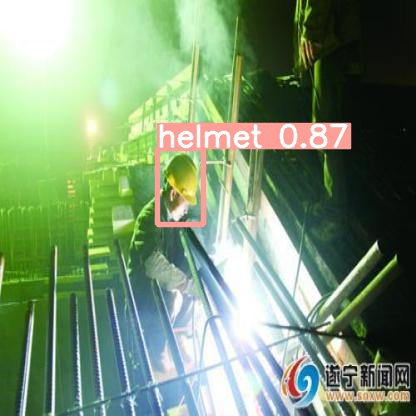

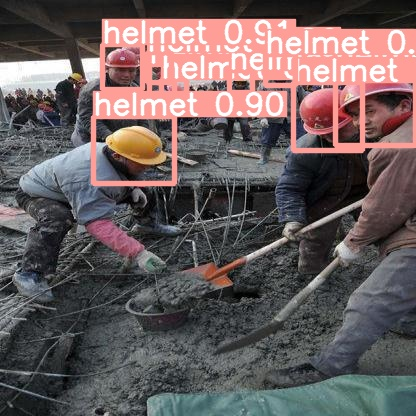

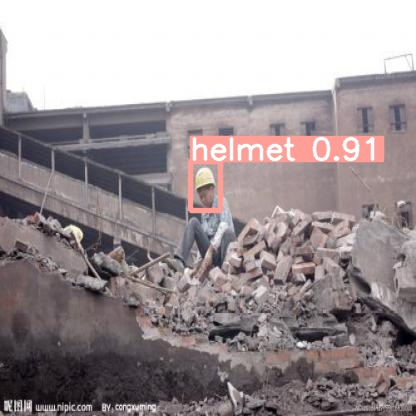

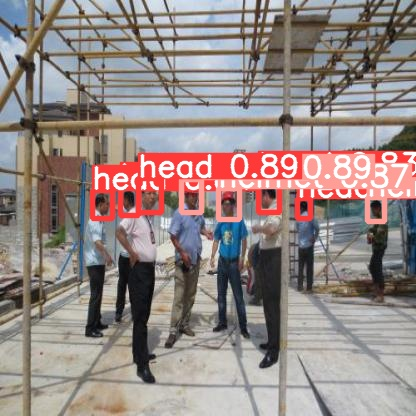

In [8]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [9]:
%ls

CONTRIBUTING.md  hubconf.py    README.md          train.py        wandb/
data/            LICENSE       requirements.txt*  tutorial.ipynb  yolov5m.pt
detect.py        models/       runs/              utils/          yolov5wandb6/
export.py        __pycache__/  setup.cfg          val.py


In [10]:
%cd ..

/content


In [11]:
!git clone https://github.com/advcloud/colablib1.git
%cd colablib1
import webcam

Cloning into 'colablib1'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.
/content/colablib1


/content/colablib1


<IPython.core.display.Javascript object>

(480, 640)
Saved to claireye.jpg


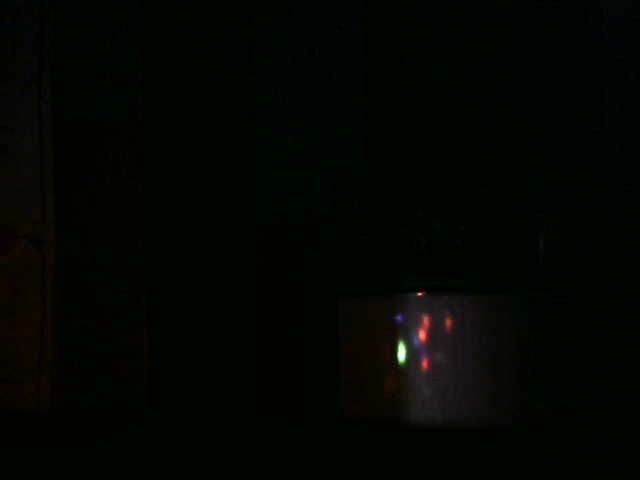

In [12]:
%cd /content/colablib1
try:
  filename = webcam.take_photo(webcam.ifile_path)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  webcam.display(webcam.Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [13]:
%ls

claireye.jpg   libmediacar1.so  libmediacar3.so  libmedia.so  webcam.so
functions1.so  libmediacar2.so  libmediacar.so   README.md


In [14]:
# use the best weights!
%cd /content/yolov5/
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --conf 0.5 --source ../colablib1/claireye.jpg
!python detect.py --weights $projectn1 --conf 0.4 --source ../colablib1/claireye.jpg

/content/yolov5
detect: weights=['yolov5wandb6/exp/weights/best.pt'], source=../colablib1/claireye.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20861016 parameters, 0 gradients
image 1/1 /content/colablib1/claireye.jpg: 480x640 Done. (0.023s)
Speed: 0.5ms pre-process, 23.2ms inference, 0.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [15]:
%ls runs/detect/exp2

claireye.jpg


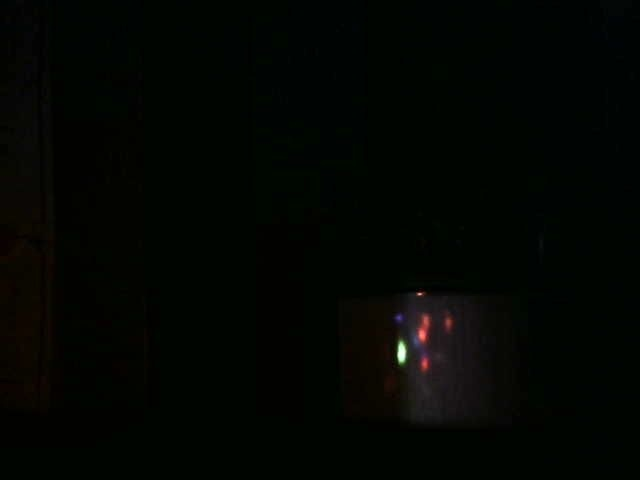

In [16]:
display(Image(filename='runs/detect/exp2/claireye.jpg'))